In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Workspace/MF_Model/Modules')

import mf_models as mf
import model_type as mt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)

In [39]:
vec_nu_i = np.array([0.005, 0.01, 0.02])
vec_nu_label = ["5", "10", "20"]
vec_alpha = np.linspace(0, 1, 101)

df_mu = pd.DataFrame({'alpha':vec_alpha,
					vec_nu_i[0]:np.zeros_like(vec_alpha),
					vec_nu_i[1]:np.zeros_like(vec_alpha),
					vec_nu_i[2]:np.zeros_like(vec_alpha)})

df_sigma_V = pd.DataFrame({'alpha':vec_alpha,
						vec_nu_i[0]:np.zeros_like(vec_alpha),
						vec_nu_i[1]:np.zeros_like(vec_alpha),
						vec_nu_i[2]:np.zeros_like(vec_alpha)})

df_nu = pd.DataFrame({'alpha':vec_alpha,
					vec_nu_i[0]:np.zeros_like(vec_alpha),
					vec_nu_i[1]:np.zeros_like(vec_alpha),
					vec_nu_i[2]:np.zeros_like(vec_alpha)})

for nu_i in vec_nu_i:
	for i, alpha in enumerate(vec_alpha):
		model_type = mt.MFInterpolatedCoBaIF(alpha_val = alpha, 
						 					EL_val = -60,
						 					EF_val = 0,
						 					ES_val = 0,
						 					EI_val = -80,
						 					wF_val = 0.1,
						 					wS_val = 0.1,
						 					wI_val = 0.4,
						 					tauF_val = 1,
						 					tauS_val = 100,
						 					tauI_val = 10,
						 					nuF_val = nu_i,
						 					nuS_val = nu_i,
						 					nuI_val = nu_i,
						 					KF_val = 400,
						 					KS_val = 400,
						 					KI_val = 100,
						 					Vth_val = -50,
						 					Vr_val = -60,
						 					tauL_val = 20,
						 					tauR_val = 2
						 				)

		LV_model = mf.LangevinModel(model_type)
		LV_model.sigmaV
		mu, sigma = LV_model.model_type.data_parameters.substitute_parameters_values([LV_model.mu, LV_model.sigmaV])
		df_mu[nu_i][i] = mu
		df_sigma_V[nu_i][i] = sigma



/tmp/ipykernel_22983/885183029.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu[nu_i][i] = mu
/tmp/ipykernel_22983/885183029.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sigma_V[nu_i][i] = sigma


In [47]:
n = 30000

for nu_i in vec_nu_i:
	print(nu_i, end='\t')
	for i, alpha in enumerate(vec_alpha):
		print(i, end=' ')
		model_type = mt.MFInterpolatedCoBaIF(alpha_val = alpha, 
						 					EL_val = -60,
						 					EF_val = 0,
						 					ES_val = 0,
						 					EI_val = -80,
						 					wF_val = 0.1,
						 					wS_val = 0.1,
						 					wI_val = 0.4,
						 					tauF_val = 1,
						 					tauS_val = 100,
						 					tauI_val = 10,
						 					nuF_val = nu_i,
						 					nuS_val = nu_i,
						 					nuI_val = nu_i,
						 					KF_val = 400,
						 					KS_val = 400,
						 					KI_val = 100,
						 					Vth_val = -50,
						 					Vr_val = -60,
						 					tauL_val = 20,
						 					tauR_val = 2
						 				)
		LV_model = mf.LangevinModel(model_type)
		FP_model = mf.FokkerPlanckModel(LV_model, True)
		E_I = model_type.data_parameters.values[model_type.vec_E[3]]
		V_th = model_type.data_parameters.values[model_type.Vth]

		vec_Vk = np.linspace(E_I, V_th, n + 1)

		df_nu[nu_i][i] = FP_model.calculate_firing_rate (vec_Vk)
	
	print()

0.005	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
0.01	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
0.02	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 


In [41]:
fRate_data_path = "../../Data/fRate_data/"
V_data_path = "../../Data/V_data/"

df_nu_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_iRate_interpolated.dat", index_col=0)
df_mu_sim_read = pd.read_csv(f"{V_data_path}mean_V_interpolated.dat", index_col=0)
df_sigma_V_sim_read = pd.read_csv(f"{V_data_path}var_V_interpolated.dat", index_col=0)

df_nu_sim_read

,alpha,5,10,20
0,0.00,0.0,0.0,0.0
1,0.02,0.0,0.0,0.0
2,0.04,10.7,17.3,15.5
3,0.06,55.6,124.2,193.8
4,0.08,129.4,217.4,313.1
5,0.10,184.6,278.1,362.2
6,0.12,222.0,316.0,389.3
7,0.14,255.1,340.9,407.3
8,0.16,279.1,360.5,421.0
9,0.18,298.1,375.3,430.4


In [50]:
df_nu_sim = pd.DataFrame({"alpha": df_nu_sim_read['alpha'],
					vec_nu_i[0]:df_nu_sim_read['5'], 
					vec_nu_i[1]:df_nu_sim_read['10'],
					vec_nu_i[2]:df_nu_sim_read['20']})

df_mu_sim = pd.DataFrame({"alpha": df_mu_sim_read['alpha'],
					vec_nu_i[0]:df_mu_sim_read['5'], 
					vec_nu_i[1]:df_mu_sim_read['10'],
					vec_nu_i[2]:df_mu_sim_read['20']})

df_sigma_V_sim = pd.DataFrame({"alpha": df_sigma_V_sim_read['alpha'],
					vec_nu_i[0]:df_sigma_V_sim_read['5'], 
					vec_nu_i[1]:df_sigma_V_sim_read['10'],
					vec_nu_i[2]:df_sigma_V_sim_read['20']})

df_analytic_comp = pd.DataFrame({vec_nu_i[0]:df_nu_sim_read['5'], 
					vec_nu_i[1]:df_nu_sim_read['10'],
					vec_nu_i[2]:df_nu_sim_read['20']})

for nu_i in vec_nu_i:
	for i in range(len(df_analytic_comp[nu_i])):
		df_analytic_comp[nu_i][i] = df_nu[nu_i][2*i]


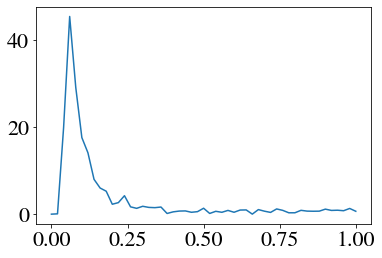

In [43]:
plt.plot(df_nu_sim_read['alpha'], np.abs(df_nu_sim[vec_nu_i[0]] - df_analytic_comp[vec_nu_i[0]]*1000))
# plt.plot(df_nu_sim['alpha'], df_nu_sim[vec_nu_i[0]], 'bo')

In [51]:
df_error = pd.DataFrame({'alpha':df_nu_sim['alpha'],
						vec_nu_i[0]:np.zeros_like(df_nu_sim['alpha']),
						vec_nu_i[1]:np.zeros_like(df_nu_sim['alpha']),
						vec_nu_i[2]:np.zeros_like(df_nu_sim['alpha'])})

for nu_i in vec_nu_i:
	for i, (nu_sim, nu_analyt) in enumerate(zip(df_nu_sim[nu_i], df_analytic_comp[nu_i])):
		df_error[nu_i][i] = np.abs(nu_sim - nu_analyt * 1000)

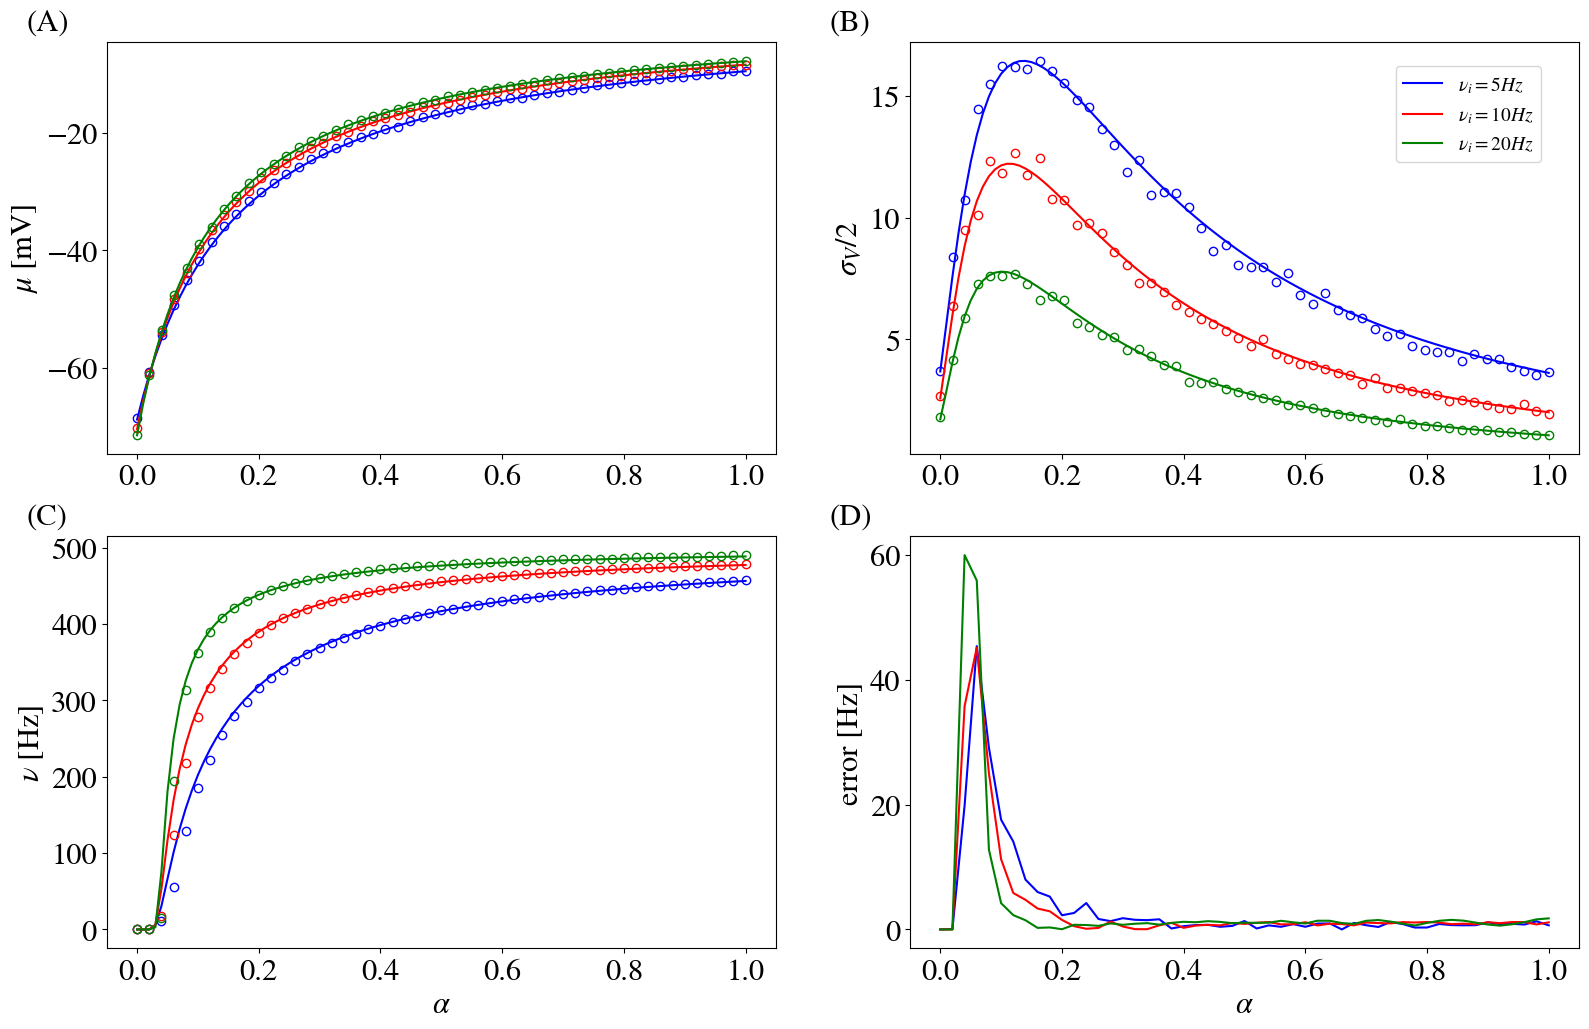

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(19,12), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][0].annotate("(C)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][1].annotate("(D)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[1][0].set_xlabel(r'$\alpha$')
axs[1][1].set_xlabel(r'$\alpha$')
axs[0][0].set_ylabel(r'$\mu$ [mV]')
axs[0][1].set_ylabel(r'$\sigma_V/2$')
axs[1][0].set_ylabel(r'$\nu$ [Hz]')
axs[1][1].set_ylabel('error [Hz]')

axs[0][0].plot(df_mu['alpha'], df_mu[vec_nu_i[0]], 'b-', label=r'$\nu_i = 5Hz$')
axs[0][0].plot(df_mu_sim['alpha'], df_mu_sim[vec_nu_i[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(df_mu['alpha'], df_mu[vec_nu_i[1]], 'r-', label=r'$\nu_i = 10Hz$')
axs[0][0].plot(df_mu_sim['alpha'], df_mu_sim[vec_nu_i[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(df_mu['alpha'], df_mu[vec_nu_i[2]], 'g-', label=r'$\nu_i = 20Hz$')
axs[0][0].plot(df_mu_sim['alpha'], df_mu_sim[vec_nu_i[2]], 'go', markerfacecolor='none')

axs[0][1].plot(df_sigma_V['alpha'], df_sigma_V[vec_nu_i[0]]/2, 'b-')
axs[0][1].plot(df_sigma_V_sim['alpha'], df_sigma_V_sim[vec_nu_i[0]], 'bo', markerfacecolor='none')
axs[0][1].plot(df_sigma_V['alpha'], df_sigma_V[vec_nu_i[1]]/2, 'r-')
axs[0][1].plot(df_sigma_V_sim['alpha'], df_sigma_V_sim[vec_nu_i[1]], 'ro', markerfacecolor='none')
axs[0][1].plot(df_sigma_V['alpha'], df_sigma_V[vec_nu_i[2]]/2, 'g-')
axs[0][1].plot(df_sigma_V_sim['alpha'], df_sigma_V_sim[vec_nu_i[2]], 'go', markerfacecolor='none')

axs[1][0].plot(df_nu['alpha'], df_nu[vec_nu_i[0]]*1000, 'b-')
axs[1][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_nu_i[0]], 'bo', markerfacecolor='none')
axs[1][0].plot(df_nu['alpha'], df_nu[vec_nu_i[1]]*1000, 'r-')
axs[1][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_nu_i[1]], 'ro', markerfacecolor='none')
axs[1][0].plot(df_nu['alpha'], df_nu[vec_nu_i[2]]*1000, 'g-')
axs[1][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_nu_i[2]], 'go', markerfacecolor='none')

axs[1][1].plot(df_error['alpha'], df_error[vec_nu_i[0]], 'b-')
axs[1][1].plot(df_error['alpha'], df_error[vec_nu_i[1]], 'r-')
axs[1][1].plot(df_error['alpha'], df_error[vec_nu_i[2]], 'g-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})

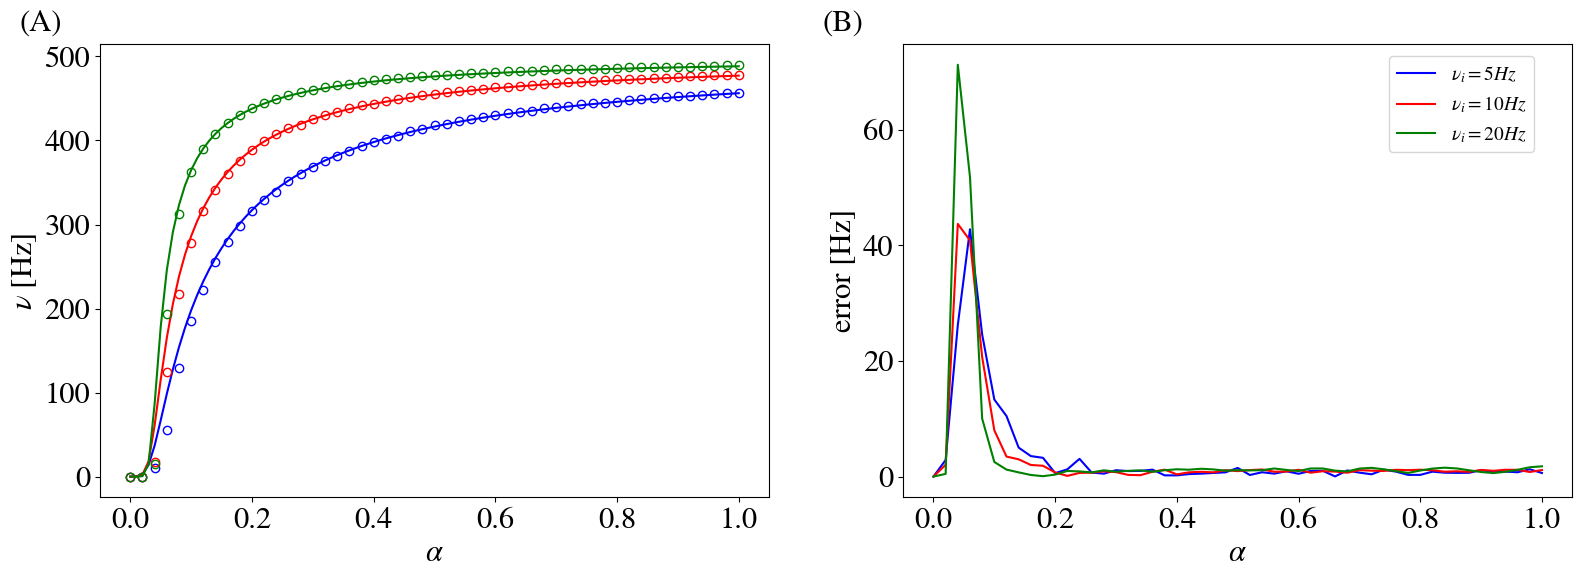

In [52]:
index = list(range(0, 200, 3))

fig, axs = plt.subplots(1, 2, figsize=(19,6), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[0][0].set_xlabel(r'$\alpha$')
axs[0][1].set_xlabel(r'$\alpha$')
axs[0][0].set_ylabel(r'$\nu$ [Hz]')
axs[0][1].set_ylabel('error [Hz]')

axs[0][0].plot(df_nu['alpha'], df_nu[vec_nu_i[0]]*1000, 'b-', label=r'$\nu_i = 5Hz$')
axs[0][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_nu_i[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(df_nu['alpha'], df_nu[vec_nu_i[1]]*1000, 'r-', label=r'$\nu_i = 10Hz$')
axs[0][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_nu_i[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(df_nu['alpha'], df_nu[vec_nu_i[2]]*1000, 'g-', label=r'$\nu_i = 20Hz$')
axs[0][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_nu_i[2]], 'go', markerfacecolor='none')

axs[0][1].plot(df_error['alpha'], df_error[vec_nu_i[0]], 'b-')
axs[0][1].plot(df_error['alpha'], df_error[vec_nu_i[1]], 'r-')
axs[0][1].plot(df_error['alpha'], df_error[vec_nu_i[2]], 'g-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})